In [129]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [138]:
class AgentState(TypedDict):
    playerName: str
    guesses: List[int]
    attempts: int = 7
    lower_bound: int
    upper_bound: int
    guessed_number: int
    message: str

In [139]:
def setup_node(state: AgentState) -> AgentState:
    state['playerName'] = state["playerName"]
    state['guesses'] = []
    state['attempts'] = 0
    state['lower_bound'] = 0
    state['upper_bound'] = 50
    state["guessed_number"] = random.randint(0, 50)
    state["message"] = f"Welcome {state['playerName']}! Let's play a guessing game. You have 7 attempts to guess the number I'm thinking of between {state['lower_bound']} and {state['upper_bound']}."
    print(state["message"])
    return state

In [140]:
def guess_number(state: AgentState) -> AgentState:
    possible_guesses = [i for i in range(state['lower_bound'], state['upper_bound'] + 1) if i not in state['guesses']]
    if not possible_guesses:
        guess = random.randint(state['lower_bound'], state['upper_bound'])
    else:
        guess = random.choice(possible_guesses)
    
    state['guesses'].append(guess)
    state['attempts'] += 1
    # print(f"{state['playerName']} guessed: {state['guessed_num']}, current range: {state['lower_bound']} to {state['upper_bound']}")
    
    return state

In [141]:
def message_node(state: AgentState) -> AgentState:
    last_guess = state['guesses'][-1]
    print(f"Bro {state['playerName']} guessed: {last_guess}, current range: {state['lower_bound']} to {state['upper_bound']}")
    if last_guess < state['guessed_number']:
        state['message'] = f"{state['playerName']}, your guess of {last_guess} is too low. Try again!"
        state['lower_bound'] = last_guess + 1
    elif last_guess > state['guessed_number']:
        state['message'] = f"{state['playerName']}, your guess of {last_guess} is too high. Try again!"
        state['upper_bound'] = last_guess - 1
    else:
        state['message'] = f"Congratulations {state['playerName']}! You guessed the number {state['guessed_number']} correctly in {state['attempts']} attempts."
    return state

In [142]:
def should_continue_node(state: AgentState) -> str:
    if state['guesses'][-1] == state['guessed_number']:
        print(f"{state['message']}")
        return "True"
    elif state['attempts'] >= 7:
        print(f"{state['playerName']} has used all attempts. Game over!")
        return "True"
    else:
        print(f"{state['playerName']} has {7 - state['attempts']} attempts left.")
        return "False"

In [143]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_number)
graph.add_node("message", message_node)
# graph.add_node("should_continue", should_continue_node)

graph.add_edge("setup", "guess")
graph.add_edge("guess", "message")

graph.add_conditional_edges(
    "message",
    should_continue_node, {
        "False": "guess",
        "True": END
    }
)
graph.set_entry_point("setup")

app = graph.compile()

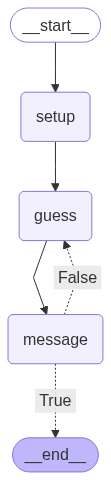

In [144]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png(), format='png'))

In [145]:
app.invoke({
    "playerName": "Shishir",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 0,
    "upper_bound": 50,
})

Welcome Shishir! Let's play a guessing game. You have 7 attempts to guess the number I'm thinking of between 0 and 50.
Bro Shishir guessed: 20, current range: 0 to 50
Shishir has 6 attempts left.
Bro Shishir guessed: 13, current range: 0 to 19
Shishir has 5 attempts left.
Bro Shishir guessed: 1, current range: 0 to 12
Congratulations Shishir! You guessed the number 1 correctly in 3 attempts.


{'playerName': 'Shishir',
 'guesses': [20, 13, 1],
 'attempts': 3,
 'lower_bound': 0,
 'upper_bound': 12,
 'guessed_number': 1,
 'message': 'Congratulations Shishir! You guessed the number 1 correctly in 3 attempts.'}